In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_test_samples = 52250

In [3]:
lgb_prob1 = np.zeros(num_test_samples)
for i in [1,2,3,4,5,6]:
    lgb_prob1 += np.load(f'./gotcha_lgb/test.lgb{i}.npy')/6
    
lgb_prob2 = np.zeros(num_test_samples)
for i in [1,2,3,4,5,6]:
    lgb_prob2 += np.load(f'./gotcha_fakeid/test.lgb{i}.npy')/6
    
rf_prob = np.zeros(num_test_samples)
for i in [1,2,3]:
    rf_prob += np.load(f'./gotcha_rf/test.rf{i}.npy')/3

In [4]:
pred_df = pd.DataFrame(np.stack([lgb_prob1,lgb_prob2,rf_prob],axis=1),
                 columns=['lgb1','lgb2','rf'])
pred_df.corr()

,lgb1,lgb2,rf
lgb1,1.000000,0.936803,0.899133
lgb2,0.936803,1.000000,0.855125
rf,0.899133,0.855125,1.000000


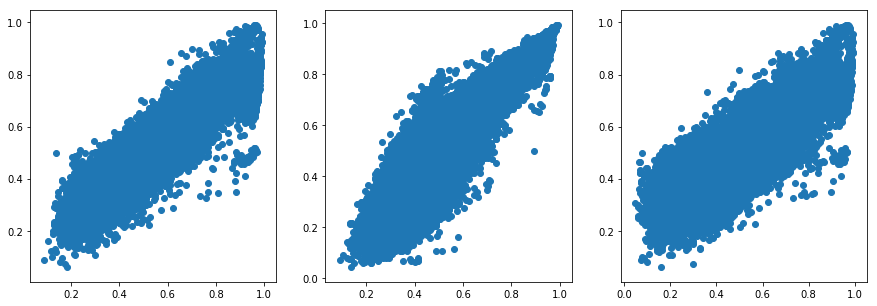

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(lgb_prob1, rf_prob)
plt.subplot(132)
plt.scatter(lgb_prob1, lgb_prob2)
plt.subplot(133)
plt.scatter(lgb_prob2, rf_prob)

In [6]:
test_feat_df = pd.read_csv('../input/test_feat_df.csv')

In [7]:
prob = 0.45*lgb_prob1+0.15*lgb_prob2 + 0.4*rf_prob
sub = test_feat_df[['sample_file_name']].copy()
sub['label'] = (prob>0.4588).astype(int)
sub.label.value_counts()

0    28321
1    23929
Name: label, dtype: int64

In [8]:
sub_pb63033 = pd.read_csv('sub_pb63033.csv')

In [9]:
(sub_pb63033.label!=sub.label).sum()

0

In [10]:
(sub_pb63033.sample_file_name!=sub.sample_file_name).sum()

0

In [11]:
sub.to_csv('./best_pb.csv',index=False)